## **In Class Activity: Feature Engineering and Linear Regression**

### **Dataset** 


* For the following few questions, we will use the synthetic generate that we create using NumPy in the cell right below.


In [1]:
# Creating the synthetic dataset
import numpy as np
import pandas as pd

np.random.seed(42)
n = 1000

# Numerical Features
x1 = np.linspace(-10, 10, n)  # Linear relationship with the target
x2 = x1**2 + np.random.randn(n) * 5  # Quadratic relationship with the target
x3 = np.random.randn(n) * 5 + 25  # Random data
x4 = x1 * 3 + np.random.randn(n) * 2  # Derived from x1, highly correlated

# Categorical Feature
categories = ['A', 'B', 'C', 'D']
weights = [0.1, 0.2, 0.3, 0.4]  # Some categories are more common
categorical = np.random.choice(categories, n, p=weights)

# Temporal Feature
date_range = pd.date_range(start='2021-01-01', periods=n, freq='D')
temporal = np.random.choice(date_range, n)

# Correctly constructing the target variable by handling the categorical values
target_effect_from_category = np.array([categories.index(cat) * 10 for cat in categorical])
target = x1 * 2 + x2 + x3 - target_effect_from_category + np.random.randn(n) * 5

df_complex = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4,
    'Categorical': categorical,
    'Temporal': temporal,
    'Target': target
})

df_complex.head()

,x1,x2,x3,x4,Categorical,Temporal,Target
0,-10.00000,102.483571,31.996777,-31.350357,D,2023-03-14,89.966849
1,-9.97998,98.908679,29.623168,-30.228977,D,2021-04-24,70.743647
2,-9.95996,102.439245,25.298152,-31.464720,B,2023-06-12,82.779315
3,-9.93994,106.417555,21.765316,-30.435743,D,2023-06-16,81.158889
4,-9.91992,97.234044,28.491117,-33.546989,C,2023-03-31,87.103607


### **Exercise 1: Explore the Dataset**

* Perform an initial exploratory data analysis (EDA) to understand the nature and types of features present. Begin by checking data types, summary statistics, and the number of unique values for each column.

In [2]:
# Write your code here 

data_types = df_complex.dtypes

# Summary statistics for numerical columns
summary_stats = df_complex.describe()
unique_values = df_complex.nunique()

data_types, summary_stats, unique_values

(x1                    float64
 x2                    float64
 x3                    float64
 x4                    float64
 Categorical            object
 Temporal       datetime64[ns]
 Target                float64
 dtype: object,
                 x1           x2           x3           x4       Target
 count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
 mean      0.000000    33.496727    25.354181     0.011668    38.952517
 std       5.782171    30.337650     4.987272    17.495589    34.528747
 min     -10.000000   -11.564536    10.298057   -34.597583   -30.817826
 25%      -5.000000     7.399631    21.968792   -14.849803    11.635290
 50%       0.000000    25.145734    25.315386    -0.051376    32.554519
 75%       5.000000    57.371003    28.644411    15.299048    60.603381
 max      10.000000   107.790839    40.965538    34.222753   145.318223,
 x1             1000
 x2             1000
 x3             1000
 x4             1000
 Categorical       4
 Temporal    

### **Exercise 2: Linear Regression Model Before Feature Engineering**

* Apply a simple linear regression model on the dataset (without any feature engineering) and compute its performance using the R^2 score.

* The R^2 score, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It provides a measure of how well the observed outcomes are replicated by the model based on the provided explanatory variables.

In [3]:
# Write your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_before = df_complex.drop(columns=['Categorical', 'Temporal', 'Target'])
y_before = df_complex['Target']
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(X_before, y_before, test_size=0.2, random_state=42)
lr_before = LinearRegression()
lr_before.fit(X_train_before, y_train_before)
y_pred_before = lr_before.predict(X_test_before)
r2_before = r2_score(y_test_before, y_pred_before)

print(f"R^2 Score before Feature Engineering: {r2_before:.4f}")

R^2 Score before Feature Engineering: 0.8877


* _Note: The R^2 score for the linear regression model trained on the dataset without any further feature engineering is approximately 0.8877. This indicates that the model is able to explain about 88.77% of the variance in the test dataset._

### **Exercise 3: One-Hot Encoding**

* Convert the categorical feature (Categorical_1) to a numerical representation using one-hot encoding.

In [4]:
# Write your code here

# One-hot encoding for 'Categorical_1' using pandas `get_dummies()` method which will 
# convert categorical columns into multiple columns of binary values (0 or 1) representing 
# the presence of each possible category value.
df_encoded = pd.get_dummies(df_complex, columns=['Categorical'], drop_first=True)
df_encoded.head()

,x1,x2,x3,x4,Temporal,Target,Categorical_B,Categorical_C,Categorical_D
0,-10.00000,102.483571,31.996777,-31.350357,2023-03-14,89.966849,0,0,1
1,-9.97998,98.908679,29.623168,-30.228977,2021-04-24,70.743647,0,0,1
2,-9.95996,102.439245,25.298152,-31.464720,2023-06-12,82.779315,1,0,0
3,-9.93994,106.417555,21.765316,-30.435743,2023-06-16,81.158889,0,0,1
4,-9.91992,97.234044,28.491117,-33.546989,2023-03-31,87.103607,0,1,0


### **Exercise 4: Scaling**

* Scale and center the numerical features using Z-score normalization (StandardScaler).
* Your resulting dataset should have the numerical columns (`Numerical_1`, `Numerical_2`, and `Numerical_3`) have been successfully scaled and centered using the Z-score normalization (StandardScaler). These columns should have a mean of 0 and a standard deviation of 1.

In [5]:
# Write your code here
from sklearn.preprocessing import StandardScaler

scale_columns = ['x1', 'x2', 'x3', 'x4']
scaler = StandardScaler()
df_encoded[scale_columns] = scaler.fit_transform(df_encoded[scale_columns])
df_encoded.head()

,x1,x2,x3,x4,Temporal,Target,Categorical_B,Categorical_C,Categorical_D
0,-1.730320,2.275106,1.332576,-1.793464,2023-03-14,89.966849,0,0,1
1,-1.726856,2.157210,0.856405,-1.729337,2021-04-24,70.743647,0,0,1
2,-1.723391,2.273644,-0.011240,-1.800004,2023-06-12,82.779315,1,0,0
3,-1.719927,2.404844,-0.719965,-1.741162,2023-06-16,81.158889,0,0,1
4,-1.716463,2.101983,0.629303,-1.919081,2023-03-31,87.103607,0,1,0


#### **Drop Highly Correlated Features**

In [6]:
df_encoded_dropped = df_encoded.drop(columns=['x4'])

### **Exercise 5: Extracting Temporal Data**

* Extract date-related features (like year, month, day) from the `Temporal_1` column.

In [7]:
# Write your code here
df_encoded_dropped['Year'] = df_encoded_dropped['Temporal'].dt.year
df_encoded_dropped['Month'] = df_encoded_dropped['Temporal'].dt.month
df_encoded_dropped['Day'] = df_encoded_dropped['Temporal'].dt.day


### **Exercise 6: Dimensionality Reduction**

* Identify and drop one or more highly correlated columns to reduce dimensionality. Showcase the correlation before and after this operation using a heatmap.

In [8]:
# Write your code here

import seaborn as sns
import matplotlib.pyplot as plt


# Compute correlation matrix for the df_encoded DataFrame (before dropping)
correlation_before = df_encoded[scale_columns].corr()


# Compute correlation matrix for the df_encoded_dropped DataFrame (after dropping)
correlation_after = df_encoded_dropped[scale_columns[:-1]].corr()  # Exclude 'x4'

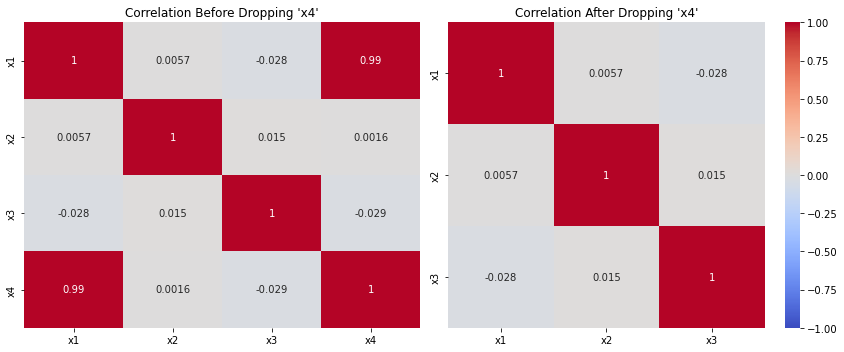

In [9]:
# Visualize the correlation matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_before, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
plt.title("Correlation Before Dropping 'x4'")

plt.subplot(1, 2, 2)
sns.heatmap(correlation_after, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation After Dropping 'x4'")

plt.tight_layout()
plt.show()

#correlation_before, correlation_after

Interpretation of results: 

_Correlation Before Dropping: `x1` and `x4` has a very high correlation of approximately  0.9935, suggesting they convey similar information.
The correlation between other numerical columns is relatively low._

_Correlation After Dropping: We dropped the `x4` column to reduce the dimensionality and multicollinearity in our dataset. The remaining columns, `x3`, `x2`. and `x1` and  have a low correlation._

### **Exercise 7: Linear Regression Model after Feature Engineering**

* Apply a linear regression model after the feature engineering tasks done in questions 3-6 and compare its R^2 score with that of the initial model (from question 5).

In [10]:
# Write your code here

X_after = df_encoded_dropped.drop(columns=['Temporal', 'Target'])
y_after = df_encoded_dropped['Target']
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(X_after, y_after, test_size=0.2, random_state=42)
lr_after = LinearRegression()
lr_after.fit(X_train_after, y_train_after)
y_pred_after = lr_after.predict(X_test_after)
r2_after = r2_score(y_test_after, y_pred_after)

print(f'R^2 score before feature engineering: {r2_before}\n')
print(f'R^2 score after feature engineering: {r2_after}')

R^2 score before feature engineering: 0.8877494540790907

R^2 score after feature engineering: 0.97677553792671


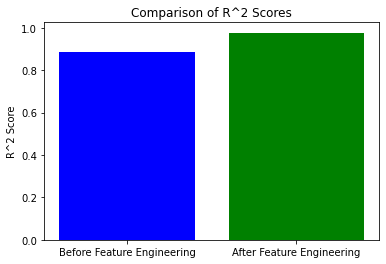

In [11]:
# Compare R^2 score before and after Feature Engineering

plt.bar(['Before Feature Engineering', 'After Feature Engineering'], [r2_before, r2_after], color=['blue', 'green'])
plt.ylabel('R^2 Score')
plt.title('Comparison of R^2 Scores')
plt.show()

### **Question 8: PCA**

* Use PCA (Principal Component Analysis) to reduce the dimensionality of the dataset and retain a specified percentage (e.g., 95%) of its variance. Observe how many components are retained after applying PCA.

In [12]:
from sklearn.decomposition import PCA

# Preparing the data for PCA (excluding target and date columns)
X_pca = df_encoded_dropped.drop(columns=['Temporal', 'Target'])

pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca_transformed = pca.fit_transform(X_pca)

num_components_retained = pca.n_components_

num_components_retained

2

**Interpretation of PCA results:**
* _After applying PCA to retain at least 95% of the dataset's variance, only 2 principal components are retained. This means that most of the variance in the dataset can be captured using just these two components, allowing for significant dimensionality reduction._